## Data Exploration with Pandas

### Importing needed libraries

In [1]:
#IPython is used to run the notebook
import IPython
print("IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print("Maplotlib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

IPython version:       8.5.0 (need at least 1.0)


ModuleNotFoundError: No module named 'numpy'

---

## Introduction

This notebook uses the [Boston Housing Prices Data Set](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).  Please read about the dataset carefully before continuing.

Load the dataset:

In [5]:
from sklearn.datasets import load_boston
bdata = load_boston()

The following commands will provide some basic information about the shape of the data:

In [10]:
print(bdata.keys())
print(bdata.feature_names)
print(bdata.data.shape)
print(bdata.target.shape)

# comment/uncomment the following if you want to see a lengthy description of the dataset
print(bdata.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted

In [11]:
boston = pd.DataFrame(bdata.data)

In [12]:
boston.columns = bdata.feature_names[:]
print(boston.shape)

(506, 13)


---

## Part 1: Descriptive analysis

### 1.1: Explore the data

Let's dig into the data a bit: Here are some questions that might be of interest.

 - 1.1.1: How many different variables are there in the dataset, and how many different observations?
 - 1.1.2: How many instances are classified as neighborhoods where the tract bounds the Charles River? 
 - 1.1.3: Show that dataset does not contain any missing values.
 - 1.1.4: Display the property tax rate in the 5 neighborhoods that have the highest median housing price.

##### 1.1.1: How many different variables are there in the dataset, and how many different observations?

In [14]:
print("There are " + str(len(boston.columns) + 1) + " unique variables.")

There are 14 unique variables.


Alternatively, we can add the target value, MEDV, to the boston dataframe. This will allow for easy calculation of summary statistics of all variables.

In [15]:
boston['MEDV'] = bdata.target 

In [16]:
print("There are " + str(len(boston.columns)) + " unique variables.")

There are 14 unique variables.


In [17]:
print("There are " + str(len(boston)) + " observations (neighborhoods) in the dataset.")

There are 506 observations (neighborhoods) in the dataset.


##### 1.1.2: How many instances are classified as neighborhoods where the tract bounds the Charles River? 

In [18]:
print("There are " + str(len(boston[boston.CHAS == 1])) + " neighborhoods classified along Charles River.")

There are 35 neighborhoods classified along Charles River.


##### 1.1.3: Show that dataset does not contain any missing values.

In [20]:
print("There are " + str(len(boston.dropna()) - len(boston)) + " missing values in the dataset.")

There are 0 missing values in the dataset.


##### 1.1.4: Display the property tax rate in the 5 neighborhoods that have the highest median housing price.

In [21]:
medv_max = boston.MEDV.max()
neigh_max_medv = boston[boston.MEDV == medv_max]
neigh_max_medv_idx = neigh_max_medv.index.tolist()
neigh_max_medv.loc[sorted(neigh_max_medv_idx)[:5],]['TAX']

161    403.0
162    403.0
163    403.0
166    403.0
186    193.0
Name: TAX, dtype: float64

### 1.2: Answering some basic questions about the data set.
 - 1.2.1: What is the median housing price in Boston's most expensive neighborhood?
 - 1.2.2: How many neighborhoods have, on average, less than 3 rooms per dwelling?
 - 1.2.3: What is the property tax rate in the least expensive neighborhood that is also adjacent to the Charles River?
 - 1.2.4: What is the crime rate in the neighborhood with the highest median housing price? 
 - 1.2.5: What is the crime rate in the neighborhood with the lowest median housing price?

##### 1.2.1: What is the median housing price in Boston's most expensive neighborhood?

In [22]:
print("The median housing price in the most expensive neighborhood is $" + str(1000 * boston.MEDV.max()))

The median housing price in the most expensive neighborhood is $50000.0


##### 1.2.2: How many neighborhoods have, on average, less than 5 rooms per dwelling?

In [29]:
print(str(boston.RM[boston.RM < 3].count()) + " neighborhoods have an average of less than 3 rooms per dwelling.")

0 neighborhoods have an average of less than 3 rooms per dwelling.


##### 1.2.3: What is the property tax rate in the least expensive neighborhood that is also adjacent to the Charles River?

In [30]:
medv_min = boston[boston['CHAS'] == 1]['MEDV'].min()

medv_min_df = boston[boston['MEDV'] == medv_min]
v = medv_min_df[medv_min_df['CHAS'] == 1]['TAX'].values[0]

In [33]:
print("The property tax rate in the least expensive neighborhood adjacent to the Charles River is $" \
    + str(v) \
    + " per $10,000.")

The property tax rate in the least expensive neighborhood adjacent to the Charles River is $403.0 per $10,000.


##### 1.2.4: What is the crime rate in the neighborhood with the highest median housing price? 

In [36]:
medv_max = boston.MEDV.max()
neigh_max_medv = boston[boston.MEDV == medv_max]
neigh_max_medv_idx = neigh_max_medv.index.tolist()
v = neigh_max_medv.loc[sorted(neigh_max_medv_idx)[0],]['CRIM']

In [37]:
print("The crime rate is the most expensive neighborhood is " \
    + str(v) \
    + " crimes per capita.")

The crime rate is the most expensive neighborhood is 1.46336 crimes per capita.


##### 1.2.5: What is the crime rate in the neighborhood with the lowest median housing price?

In [38]:
medv_min = boston.MEDV.min()
neigh_min_medv = boston[boston.MEDV == medv_min]
neigh_min_medv_idx = neigh_min_medv.index.tolist()
v = neigh_min_medv.loc[sorted(neigh_min_medv_idx)[0],]['CRIM']

In [39]:
print("The crime rate is the least expensive neighborhood is " \
    + str(v) \
    + " crimes per capita.")

The crime rate is the least expensive neighborhood is 38.3518 crimes per capita.


### 1.3: Summary statistics

Creating a clean, organized table that shows the following information for each variable in the dataset
 - The name of the variable
 - The number of observations with non-missing values
 - The mean of the variable
 - The standard deviation of the variable
 - The minimum value of the variable
 - The median of the variable
 - The maximum value of the variable

In [47]:
stats = pd.DataFrame({
        'Observations': boston.count(),
        'Mean': boston.mean(),
        'SD': boston.std(),
        'Min': boston.min(),
        'Median': boston.median(),
        'Max': boston.max(),
    })

stats[['Observations', 'Mean', 'SD', 'Min', 'Median', 'Max']]

,Observations,Mean,SD,Min,Median,Max
CRIM,506,3.613524,8.601545,0.00632,0.25651,88.9762
ZN,506,11.363636,23.322453,0.00000,0.00000,100.0000
INDUS,506,11.136779,6.860353,0.46000,9.69000,27.7400
CHAS,506,0.069170,0.253994,0.00000,0.00000,1.0000
NOX,506,0.554695,0.115878,0.38500,0.53800,0.8710
RM,506,6.284634,0.702617,3.56100,6.20850,8.7800
AGE,506,68.574901,28.148861,2.90000,77.50000,100.0000
DIS,506,3.795043,2.105710,1.12960,3.20745,12.1265
RAD,506,9.549407,8.707259,1.00000,5.00000,24.0000
TAX,506,408.237154,168.537116,187.00000,330.00000,711.0000


### 1.4 Simple statistical tests

Is the median house value in locations that are adjacent to the Charles River different from the median house value in locations that are not adjacent to the Charles River?
A t-test can be used to answer this question by stating the null and alternative hypothesis.

In [48]:
sp.stats.ttest_ind(boston[boston.CHAS == 0].MEDV, boston[boston.CHAS == 1].MEDV, axis = 0, equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

**Null hypothesis:** The median house value in locations that are adjacent to the Charles River are the same as the median house value in locations that are not adjacent to the Charles River. <br>

**Alternative hypothesis:** The median house value in locations that are adjacent to the Charles River are different than the median house value in locations that are not adjacent to the Charles River. <br>

Using the assumption that the price of housing in neighborhoods adjacent to the Charles River is independent of the price of housing in neighborhoods not adjacent to the Charles River, and the assumption that the variances are different, performing a t-test for the means of the two independent samples is useful. We find that the difference in housing prices is statistically different from zero. Houses in neighborhoods adjacent to the Charles River, on average, have a higher value than houses in neighborhoods not adjacent to the Charles River.

### 1.5 Simple Linear Regression

Here, we estimate a linear regression of housing value (the dependent variable) on "% lower status of the population" (the independent variable), with no other control variables. 

A couple of things to be done: 
1) Interpret the coefficients and standard errors. 
2) Interpret the R2 value. Based on this evidence, can we conclude anything about the causal effect of increasing the "% lower status of the population" on housing value?

In [49]:
import statsmodels.api as sm

# create the regression in the form (y,X)
X = sm.add_constant(boston['LSTAT'].values)
y = boston['MEDV'].values
ols = sm.OLS(y, X)

# run the regression
ols_result = ols.fit()
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 23 Sep 2022   Prob (F-statistic):           5.08e-88
Time:                        22:39:58   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
x1            -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Coefficients:** 34.553 (intercept) and -0.9500 (LSTAT) <br>
**R^2** 0.544 <br>
**Standard error:** 0.563 (intercept) and 0.039 (LSTAT) <br>

The R^2 value of 0.544 tells us that our model accounts for 54.4% of the variance in the data. This indicates the degree of clustering around the line. There is a negative relationship between the % lower status of the population in a neighboorhood and its median housing value. The standard error of our coefficents are 0.563 and 0.039 for the intercept and LSTAT variable respectively, which measures the variance of the coefficent across the observations. The coefficents are also statistically significant, as the p-values < 0.05. This though, does not nessesarily imply a **causal** effect.

---

## Part 2: Histograms and Scatterplots


### 2.1: Histogram of housing prices

Steps to create histogram of housing prices.

1. Add appropriate labels to the x and y axes, including units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


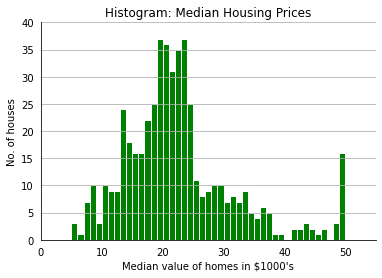

In [50]:
# prepare IPython to work with matplotlib and import the library to something convenient
%matplotlib inline  
import matplotlib.pyplot as plt  

max = bdata.target.max()
min = bdata.target.min()

# plotting
plt.hist(bdata.target, bins=int(max-min) , facecolor='g', edgecolor='white')
plt.axis([min-5,max+5,0,40])
plt.xlabel("Median value of homes in $1000's")
plt.ylabel("No. of houses")
plt.title("Histogram: Median Housing Prices")

#polishing
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')

plt.gca().yaxis.grid(True) # Add horizontal grid lines
plt.show()

### 2.2: Boxplot of housing prices

Here I create a **horizontal** boxplot that shows the distribution of the median value of houses that are adjacent to the Charles river and the houses that are not adjacent to the Charles rivers.

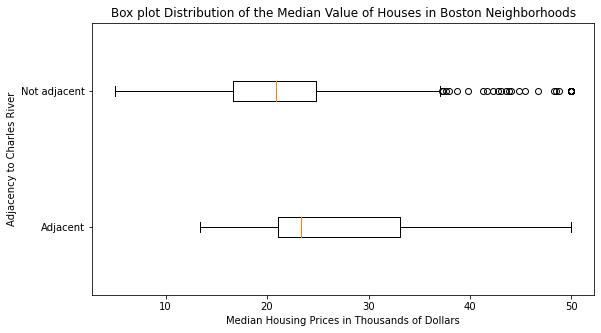

In [51]:

import matplotlib.pyplot as plt  

# make figure and subplot
fig = plt.figure(figsize =(9, 5)) 
ax = fig.add_subplot(111) 

# make the box plot
plt.boxplot([boston[boston['CHAS'] == 1]['MEDV'].values, boston[boston['CHAS'] == 0]['MEDV'].values], vert=False)

# set title and axes
plt.title("Box plot Distribution of the Median Value of Houses in Boston Neighborhoods") 
ax.set_yticklabels(['Adjacent', 'Not adjacent'])
plt.xlabel("Median Housing Prices in Thousands of Dollars")
plt.ylabel('Adjacency to Charles River')

plt.show()

### 2.3: Interpret the boxplot above

There does appear to be a difference between the distribution of the median housing prices adjacent to Charles river and the ones not adjacent to Charles river. Typically, neighboorhoods that are adjacent to the charles river have higher median house values than houses that are not adjacent to the charles river. The minimum housing value for neighborhoods not adjacent to the charles river is lower than the minimum housing value adjacent to the charles river, and the maximum is greater for neighborhoods adjacent to the charles river. Additonally, there are several high outliers for houses that are not adjacent to the charles river. 

### 2.4 Correlation Matrix

Calculating the correlation of every pair of variables in the dataset. This creastes a *K* x *K* matrix where the value in the (*i*,*j*) cell is the correlation between the *i*th and *j*th variable. A question of interest here is what two variables appear to me most positively and negatively correlated?

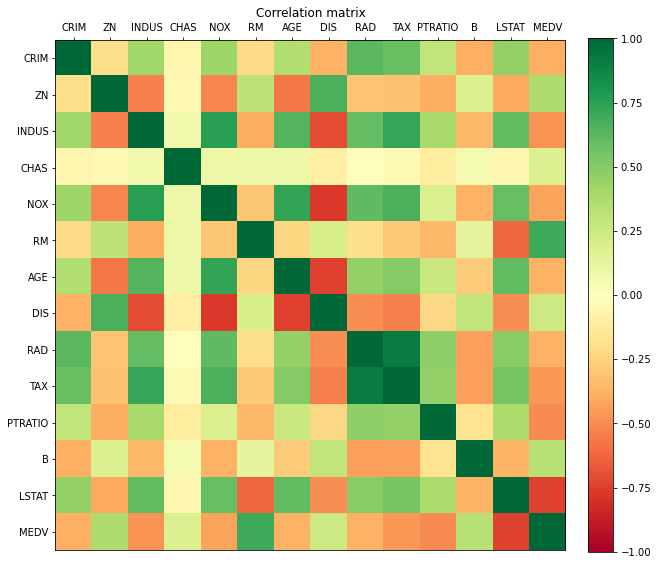

In [53]:
fig = plt.figure(figsize=(10, 10))
axes = fig.add_subplot(111)

mat = axes.matshow(boston.corr(method='pearson'), vmin=-1, vmax=1, cmap=plt.cm.RdYlGn)

fig.colorbar(mat,fraction=0.046, pad=0.04)
axes.set_title('Correlation matrix')
axes.set_xticks(range(len(boston.columns)))
axes.set_xticklabels(boston.columns)
axes.set_yticks(range(len(boston.columns)))
axes.set_yticklabels(boston.columns)
axes.xaxis.set_ticks_position('top')
axes.yaxis.set_ticks_position('left')

plt.show()

In [55]:
boston_corr = boston.corr(method='pearson')
np.min(boston_corr)

CRIM      -0.388305
ZN        -0.569537
INDUS     -0.708027
CHAS      -0.121515
NOX       -0.769230
RM        -0.613808
AGE       -0.747881
DIS       -0.769230
RAD       -0.494588
TAX       -0.534432
PTRATIO   -0.507787
B         -0.444413
LSTAT     -0.737663
MEDV      -0.737663
dtype: float64

In [60]:
min_corr = np.min(np.min(boston_corr))
boston_corr[boston_corr.DIS == min_corr]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
NOX,0.420972,-0.516604,0.763651,0.091203,1.0,-0.302188,0.73147,-0.76923,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321


NOX and DIS are most negatively correlated.

In [62]:
np.max(boston_corr[boston_corr != 1])

CRIM       0.625505
ZN         0.664408
INDUS      0.763651
CHAS       0.175260
NOX        0.763651
RM         0.695360
AGE        0.731470
DIS        0.664408
RAD        0.910228
TAX        0.910228
PTRATIO    0.464741
B          0.333461
LSTAT      0.603800
MEDV       0.695360
dtype: float64

In [63]:
max_corr = np.max(np.max(boston_corr))
boston_corr[boston_corr.RAD == max_corr]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.0,0.910228,0.464741,-0.444413,0.488676,-0.381626


RAD and TAX are most positively correlated.